In [1]:
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams

rcParams["figure.dpi"] = 100
rcParams["font.size"] = 12

from matplotlib import pyplot as plt
import numpy as np

from spamm.run_spamm import spamm
from astropy.modeling.powerlaws import PowerLaw1D

In [16]:
# Define the unit-less wavelength and flux
wave = np.arange(1000, 4000)

# Just generate a simple sample power law for a spectrum
pl = PowerLaw1D(amplitude=1.5e-17, x_0=2500, alpha=2.0)
flux = pl(wave)

# Make the error 5% of the flux array 
flux_err = flux * 0.05

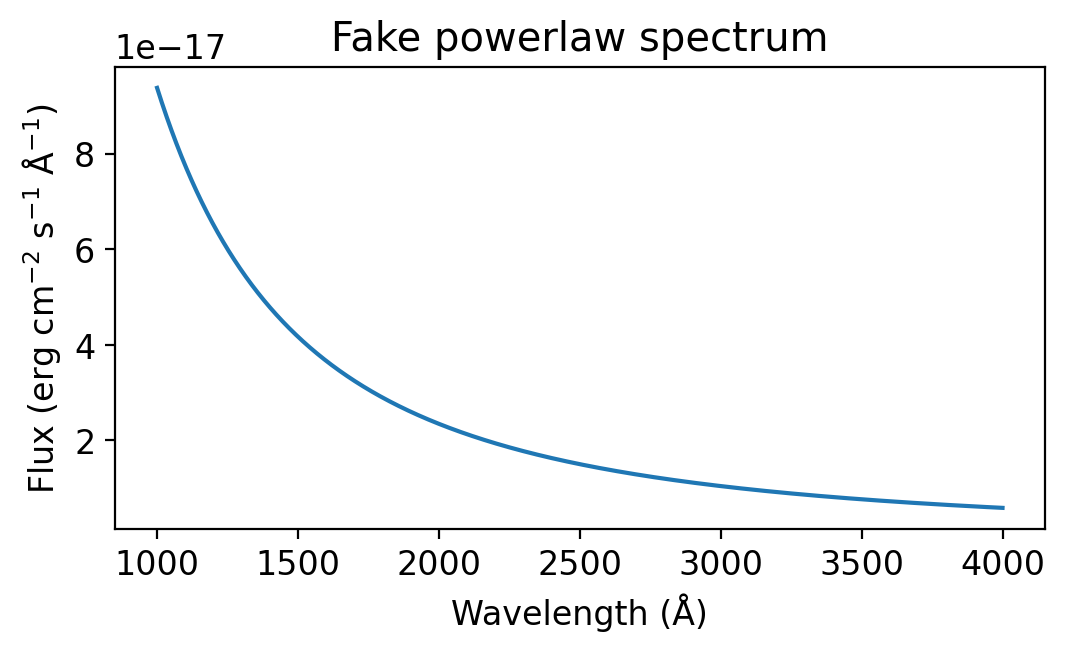

In [17]:
fig = plt.figure(figsize=(6,3))
plt.plot(wave, flux)
plt.title("Fake powerlaw spectrum")
plt.xlabel("Wavelength (Å)")
plt.ylabel(r"Flux (erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)");

In [19]:
# Run spamm
spamm_out = spamm(complist=['PL'], inspectrum=(wave, flux, flux_err),
                  n_walkers=32, n_iterations=1000, parallel=False,
                  outdir="powerlaw_example", picklefile="powerlaw")

100%|██████████████████████████████████████| 1000/1000 [00:08<00:00, 120.66it/s]


Mean acceptance fraction: 0.688
Saved pickle file powerlaw_example/powerlaw.pickle.gz
Plotting the sample projections.
	Saved powerlaw_triangle.png
Plotting the MCMC chains.
	Saved powerlaw_chain.png
Plotting the model posterior PDFs.
	Saved powerlaw_posterior.png
Saved powerlaw_example/powerlaw_posterior.pdf
executed in 0:00:08.900374


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>